# MNIST Handwritten Digits Classification Using Neural Network

Before getting started, few thing i have to point out.
This is my first project in Neural Network using keras/tensorflow ,and also this project is a continuation of my earlier project 'Neural Network from Scratch' using Pandas and Numpy.


### MNIST Dataset


In [1]:
# Import all the libraries required 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from sklearn.metrics import classification_report
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Sequential

Before diving into Deep learning it's better to get an idea about the dataset.
So, import dataset from keras dataset


In [2]:
# Import MNIST Dataset
from keras.datasets import mnist

In [3]:
# Assign the data into train and test datas
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [4]:
# Let's check for the shape of the datasets
print('Shape of Train dataset',x_train.shape)
print('Shape of Train target',y_train.shape)
print('Shape of Test dataset',x_test.shape)
print('Shape of Test target',y_test.shape)

Shape of Train dataset (60000, 28, 28)
Shape of Train target (60000,)
Shape of Test dataset (10000, 28, 28)
Shape of Test target (10000,)


Shape of images is 28x28. So we have images with total pixels of 28x28 = 784 for each images. In order to do fully connected neural network we have to flattern this image into a single vector of 784 pixels. Eventhough we loss information of pixels spatial relationships, fully connected neural network works very well for this kind of problems.

Let's visualize some of the images

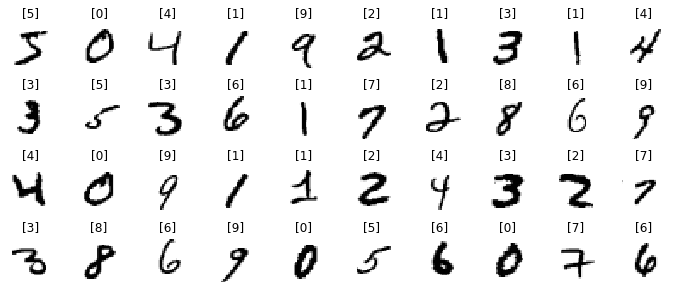

In [5]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(x_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title([y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5);

Scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255 (NNs like normalized inputs).

In [6]:
 x_train = x_train/255
 x_test = x_test/255

In [7]:
#Just set random_seed 
np.random.seed(42)
tf.random.set_seed(42)

Convert target values to "one-hot" vectors using the to_categorical function

In [8]:
#num_classes = 10
#y_train = tf.keras.utils.to_categorical(y_train, num_classes)
#y_test = tf.keras.utils.to_categorical(y_test, num_classes)

## Build First Neural Network

We have to take care of many things to make a good neural network. Like, Number of layers, Number of nodes in each of those layers, Activation functions, Optimizer, Loss function etc.

Here we are making out first model with  ''Gradient Descent' optimizer and 'categorical crossentropy' as loss function and for the all hidden layers 'sigmoid' is the activation function.

In [9]:
# Let's build our first model
# One hideen layer with 32 units
model = tf.keras.models.Sequential([
                            tf.keras.layers.Flatten(input_shape=[28,28]),
                            tf.keras.layers.Dense(32,activation='sigmoid'),
                            tf.keras.layers.Dense(10,activation='softmax')  
                            ])

In [10]:
# Compile the model and visualise the layers
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['accuracy']
              )
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Fit the model - Epochs = 20  Batch_Size = 128 Validation_split = 1%
history = model.fit(x_train,y_train,epochs=20,batch_size=128,validation_split=0.1) 

Epoch 1/20
422/422 [==============================] - 3s 6ms/step - loss: 2.1688 - accuracy: 0.3644 - val_loss: 1.9610 - val_accuracy: 0.6315
Epoch 2/20
422/422 [==============================] - 2s 5ms/step - loss: 1.8239 - accuracy: 0.6461 - val_loss: 1.6529 - val_accuracy: 0.7093
Epoch 3/20
422/422 [==============================] - 2s 5ms/step - loss: 1.5479 - accuracy: 0.6990 - val_loss: 1.3918 - val_accuracy: 0.7465
Epoch 4/20
422/422 [==============================] - 2s 5ms/step - loss: 1.3243 - accuracy: 0.7377 - val_loss: 1.1876 - val_accuracy: 0.7850
Epoch 5/20
422/422 [==============================] - 2s 4ms/step - loss: 1.1520 - accuracy: 0.7699 - val_loss: 1.0309 - val_accuracy: 0.8200
Epoch 6/20
422/422 [==============================] - 2s 4ms/step - loss: 1.0200 - accuracy: 0.7960 - val_loss: 0.9105 - val_accuracy: 0.8430
Epoch 7/20
422/422 [==============================] - 2s 4ms/step - loss: 0.9178 - accuracy: 0.8157 - val_loss: 0.8164 - val_accuracy: 0.8610
Epoch 

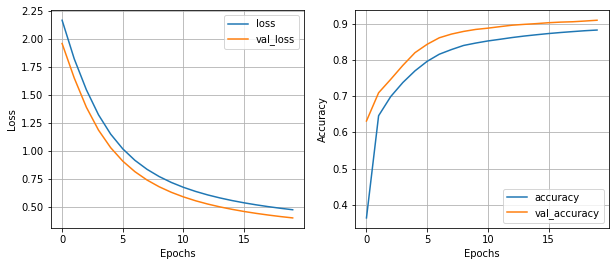

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot(kind='line', ax=axs[0],grid=True,xlabel='Epochs',ylabel='Loss')
history_df[['accuracy', 'val_accuracy']].plot(kind='line', ax=axs[1],grid=True,xlabel='Epochs',ylabel='Accuracy');

Let's print test accuracy and Loss


In [13]:
y_pred = model.predict(x_test)

Final activation function we used in softmax which will give output as probability for each classes. So we will use argmax function to get the highest probable class for each output.


In [14]:
y_pred = np.argmax(y_pred,axis=1)

In [15]:
 loss,accuracy = model.evaluate(x_test, y_test)
 print('Loss in test data',loss,'   Accuracy of testing ')

313/313 [==============================] - 0s 1ms/step - loss: 0.4470 - accuracy: 0.8911
Loss in test data 0.44696611166000366    Accuracy of testing 


What about confusion matrix ?

In [16]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       980
           1       0.93      0.97      0.95      1135
           2       0.90      0.86      0.88      1032
           3       0.87      0.89      0.88      1010
           4       0.87      0.91      0.89       982
           5       0.86      0.79      0.83       892
           6       0.91      0.91      0.91       958
           7       0.90      0.89      0.89      1028
           8       0.87      0.84      0.85       974
           9       0.87      0.86      0.86      1009

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



## What are the tunable parameters ?

A single hideen layer of 32 units give an incredible result of accuracy 90%. How other paramters like No of hidden layer, Number of units in each layer effects the accuracy of the model ! 

### Build model with more hidden layers and Neurons

Lets write a function for this part so we can use it easly for each combinaions of layer and neurons

In [17]:
# Create Layers
def create_layers(layer_units):
  model = Sequential()
  model.add(Flatten(input_shape=[28,28]))
  for i in layer_units:
    model.add(Dense(i,activation='sigmoid'))
  model.add(Dense(units=10, activation='softmax'))
  return model
# Input will be number of units in each layers
# In this problem our input size in [28,28] and output size in 10 (10 Classes)
# At each layers, the activation function is sigmoid and the output activation function is softmax

In [18]:
# Evaluate the model
def evaluate(layer_units):
  # We are setting some default parameters
  batch_size = 128;epochs=50
  model = create_layers(layer_units)
  # Model summary
  #model.summary()
  print('Model with {} Hidden Layer and {} Neurons'.format(len(layer_units),layer_units))
  model.compile(loss='sparse_categorical_crossentropy',optimizer=tf.keras.optimizers.SGD(),metrics='accuracy')
  history = model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,validation_split=0.1,verbose=0)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.grid(True)
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend(['Training','Validation'])
  plt.show()

Lets make few model with different number of layers and see the perfomance of the model

Model with 1 Hidden Layer and [32] Neurons


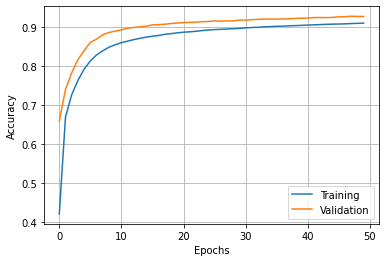

Model with 2 Hidden Layer and [32, 32] Neurons


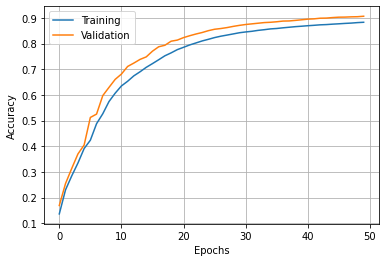

Model with 3 Hidden Layer and [32, 32, 32] Neurons


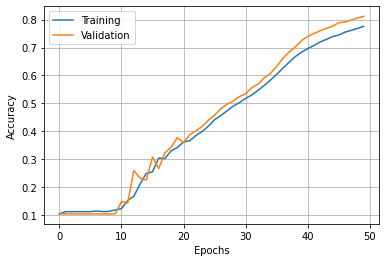

In [19]:
# 1 Layer model 
evaluate([32]) #One Hidden Layer
evaluate([32,32]) # Two Hidden Layer
evaluate([32,32,32]) # Three Hidden Layer

Increasing the number of hidden layers doest need to improve the model accuracy. Model with two hidden layers is giving much better results than four hidden layers.

Lets see how's model perfomance with signle layer with different number of units

Model with 1 Hidden Layer and [32] Neurons


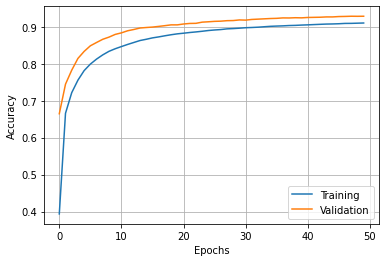

Model with 1 Hidden Layer and [128] Neurons


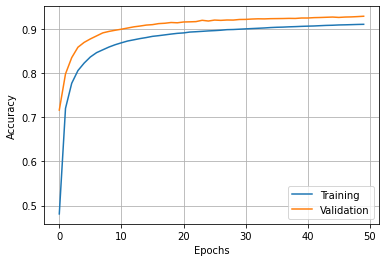

Model with 1 Hidden Layer and [512] Neurons


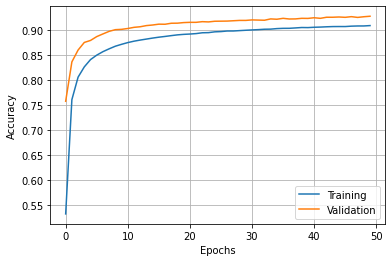

Model with 1 Hidden Layer and [1024] Neurons


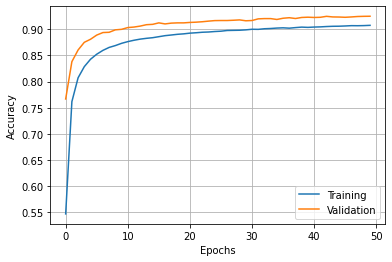

In [20]:
evaluate([32])
evaluate([128])
evaluate([512])
evaluate([1024])

We could see that there is slight difference in model perfomance with different number of neurons. So combination of both these parameters could give better results .

### Hyperparameter Tuning - 1

We can use Keras Tuner for Hyper parameter tuning for ANN
(!pip install -q -U keras-tuner)

In [21]:
!pip install -q -U keras-tuner

In [22]:
import kerastuner.tuners as kt
import tensorflow.keras

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  """Entry point for launching an IPython kernel.


For the sake of simplicity, we can start a model with one Hidden Layer.
 The hyper paremters are No of units and Learning rate.
 

In [31]:
def model_builder(hp):
  model = tensorflow.keras.Sequential()
  model.add(tensorflow.keras.layers.Flatten(input_shape=(28, 28)))

  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512
  hp_units = hp.Int('units', min_value=32, max_value=256, step=32)
  model.add(tensorflow.keras.layers.Dense(units=hp_units, activation='relu'))
  model.add(tensorflow.keras.layers.Dense(10,activation='softmax'))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  model.compile(optimizer=tensorflow.keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=tensorflow.keras.losses.SparseCategoricalCrossentropy(),
                metrics=['accuracy'])

  return model

In [32]:
# Hyper_band tuner
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='my_dir',
                     project_name='intro_to_kt')

INFO:tensorflow:Reloading Oracle from existing project my_dir/intro_to_kt/oracle.json
INFO:tensorflow:Reloading Tuner from my_dir/intro_to_kt/tuner0.json


In [33]:
# Fit the model using earlystopping 
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [34]:
tuner.search(x_train, y_train, epochs=50, validation_split=0.2, callbacks=[stop_early])

INFO:tensorflow:Oracle triggered exit


In [35]:
# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")


The optimal number of units in the first densely-connected
layer is 128 and the optimal learning rate for the optimizer
is 0.0001.



Build the model with optimal number of epochs to train the model with hyperparamters obtained from the search.

In [36]:
# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
model = tuner.hypermodel.build(best_hps)
history = model.fit(x_train, y_train, epochs=50, validation_split=0.1,verbose=False)

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Best epoch: 40


Re-instantiate the hypermodel and train it with the optimal number of epochs from above.

In [37]:
hypermodel = tuner.hypermodel.build(best_hps)

# Retrain the model
hypermodel.fit(x_train, y_train, epochs=best_epoch, validation_split=0.2,verbose=False)


To finish this tutorial, evaluate the hypermodel on the test data.

In [38]:
eval_result = hypermodel.evaluate(x_test, y_test,verbose=False)
print("[test loss, test accuracy]:", eval_result)

[test loss, test accuracy]: [0.07752675563097, 0.9761999845504761]


Using hyper parameter tuning we are getting testing accurayc of 97 %.

### Hyperparameter Tuning - 2

In previous section we havent inluded the hyperparameter tuning for no of hidden layers in our model. Let's add that parameter too.

In [39]:
def model_builder(hp):
  model = tensorflow.keras.Sequential()
  model.add(tensorflow.keras.layers.Flatten(input_shape=(28, 28)))
  # Tune the number of hidden layer between 1 -4 and No of neurons between 32-256 in each layer
  for i in range(hp.Int('num_layers', 1, 4)):
        model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=256,
                                            step=32),
                               activation='relu'))
  model.add(tensorflow.keras.layers.Dense(10))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  model.compile(optimizer=tensorflow.keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=tensorflow.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  return model

In [40]:
# Hyper_band tuner
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='my_dir_dig',
                     project_name='digits')

INFO:tensorflow:Reloading Oracle from existing project my_dir_dig/digits/oracle.json
INFO:tensorflow:Reloading Tuner from my_dir_dig/digits/tuner0.json


In [41]:
# Fit the model using earlystopping 
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [42]:
tuner.search(x_train, y_train, epochs=50, validation_split=0.2, callbacks=[stop_early])

INFO:tensorflow:Oracle triggered exit


In [43]:
# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The optimal number of units in the first densely-connected
layer is {best_hps.get('num_layers')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")


The optimal number of units in the first densely-connected
layer is 1 and the optimal learning rate for the optimizer
is 0.001.



In [44]:
# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
model = tuner.hypermodel.build(best_hps)
history = model.fit(x_train, y_train, epochs=50, validation_split=0.1,verbose=False)

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Best epoch: 38


In [ ]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

Re-instantiate the hypermodel and train it with the optimal number of epochs from above.

In [45]:
hypermodel = tuner.hypermodel.build(best_hps)
# Retrain the model
hypermodel.fit(x_train, y_train, epochs=best_epoch, validation_split=0.2,verbose=False)


To finish this tutorial, evaluate the hypermodel on the test data.

In [46]:
eval_result = hypermodel.evaluate(x_test, y_test,verbose=False)
print("[test loss, test accuracy]:", eval_result)

[test loss, test accuracy]: [0.13664376735687256, 0.9819999933242798]


In [47]:
# Predict the output and visualize the Classification results
y_predict = hypermodel.predict(x_test)
y_predict = np.argmax(y_predict,axis=1)
print(classification_report(y_predict,y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       979
           1       1.00      0.99      0.99      1144
           2       0.98      0.98      0.98      1030
           3       0.98      0.98      0.98      1013
           4       0.97      0.99      0.98       969
           5       0.98      0.98      0.98       895
           6       0.98      0.98      0.98       960
           7       0.98      0.98      0.98      1022
           8       0.98      0.98      0.98       977
           9       0.98      0.98      0.98      1011

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



## Conclusion

In this project I have only inluded simple implimentaion and hyper paremter tuning of the model. Eventhough the model with single hidden layer performed verywell,the hyperparamter tuning improved it slight more.

There are other factors we should take consider while improving perfomance of the model. Multiple activation functions are there with different perfomance based on the datasets and problem statement. We have used 'Sigmoid' and 'Relu' activation functions for our models, and Relu perfomed far better. 
In the next article I will add more complex neural networks models and how can we improve model perfomance in both time and accuracy  domain.
